# Распознавание объектов на изображениях из набора данных CIFAR-10


In [ ]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
# Размер мини-выборки
batch_size = 128
# Количество классов изображений
nb_classes = 10
# Количество эпох для обучения
nb_epoch = 25
# Размер изображений
img_rows, img_cols = 32, 32
# Количество каналов в изображении: RGB
img_channels = 3
# Названия классов из набора данных CIFAR-10
classes=['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

## Подготовка данных

**Загружаем данные**

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


**Просмотр примеров данных**

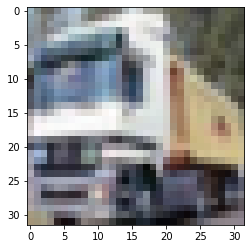

Номер класса: [9]
Тип объекта: грузовик


In [ ]:
n = 1
plt.imshow(X_train[n])
plt.show()
print("Номер класса:", y_train[n])
print("Тип объекта:", classes[y_train[n][0]])

**Нормализуем данные**

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

**Преобразуем правильные ответы в формат one hot encoding**

In [ ]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

## Создаем нейронную сеть

In [ ]:
# Создаем последовательную модель
model = Sequential()
# Первый сверточный слой
model.add(Conv2D(32, (3, 3), padding='same',
                        input_shape=(32, 32, 3), activation='relu'))
# Второй сверточный слой
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
# Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))

# Третий сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# Четвертый сверточный слой
model.add(Conv2D(64, (3, 3), activation='relu'))
# Второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))
# Слой преобразования данных из 2D представления в плоское
model.add(Flatten())
# Полносвязный слой для классификации
model.add(Dense(512, activation='relu'))
# Слой регуляризации Dropout
model.add(Dropout(0.5))
# Выходной полносвязный слой
model.add(Dense(nb_classes, activation='softmax'))

**Печатаем информацию о сети**

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                        

**Компилируем модель**

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Обучаем нейронную сеть

In [ ]:
history = model.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=nb_epoch,
              validation_split=0.1,
              shuffle=True,
              verbose=2)

Epoch 1/25
352/352 - 17s - loss: 1.6466 - accuracy: 0.3946 - val_loss: 1.2658 - val_accuracy: 0.5508 - 17s/epoch - 49ms/step
Epoch 2/25
352/352 - 8s - loss: 1.2304 - accuracy: 0.5587 - val_loss: 1.0323 - val_accuracy: 0.6312 - 8s/epoch - 22ms/step
Epoch 3/25
352/352 - 8s - loss: 1.0469 - accuracy: 0.6290 - val_loss: 0.8937 - val_accuracy: 0.6930 - 8s/epoch - 22ms/step
Epoch 4/25
352/352 - 8s - loss: 0.9300 - accuracy: 0.6713 - val_loss: 0.7968 - val_accuracy: 0.7270 - 8s/epoch - 22ms/step
Epoch 5/25
352/352 - 8s - loss: 0.8543 - accuracy: 0.7004 - val_loss: 0.7722 - val_accuracy: 0.7310 - 8s/epoch - 22ms/step
Epoch 6/25
352/352 - 8s - loss: 0.7911 - accuracy: 0.7223 - val_loss: 0.7342 - val_accuracy: 0.7466 - 8s/epoch - 22ms/step
Epoch 7/25
352/352 - 8s - loss: 0.7403 - accuracy: 0.7397 - val_loss: 0.7037 - val_accuracy: 0.7568 - 8s/epoch - 22ms/step
Epoch 8/25
352/352 - 8s - loss: 0.7025 - accuracy: 0.7514 - val_loss: 0.6814 - val_accuracy: 0.7652 - 8s/epoch - 22ms/step
Epoch 9/25
352

## Оцениваем качетсво обучения сети

In [ ]:
# Оцениваем качество обучения модели на тестовых данных
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))

Точность работы на тестовых данных: 79.79%


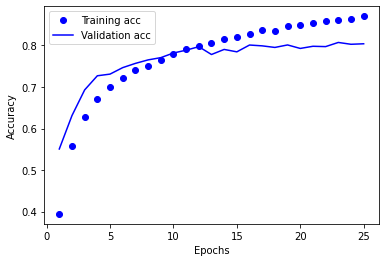

In [ ]:
#@title Текст заголовка по умолчанию
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Сохраняем обученную нейронную сеть

In [ ]:
model_json = model.to_json()
json_file = open("cifar10_model.json", "w")
json_file.write(model_json)
json_file.close()
model.save_weights("cifar10_model.h5")

In [ ]:
!ls

cifar10_model.h5  cifar10_model.json  sample_data


In [ ]:
from google.colab import files

In [ ]:
files.download("cifar10_model.json")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download("cifar10_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Применяем сеть для распознавания объектов на изображениях

**Просмотр изображения из набора данных для тестирования**

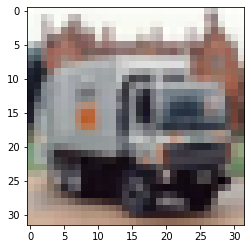

In [ ]:
from keras.preprocessing.image import array_to_img
index=11
img_pil = array_to_img(X_test[index])
plt.imshow(img_pil)
plt.show()

**Преобразование тестового изображения**

In [ ]:
x = X_test[index]
x = np.expand_dims(x, axis=0)

**Запуск распознавания**

In [ ]:
prediction = model.predict(x)

**Печатаем результаты распознавания**

In [ ]:
print(prediction)

[[4.63482551e-13 2.32940183e-05 3.39877317e-16 1.35745390e-14
  6.24044764e-20 1.12244315e-17 2.83191649e-16 3.51047263e-18
  2.38571191e-10 9.99976754e-01]]


**Преобразуем результаты из формата one hot encoding**

In [ ]:
prediction = np.argmax(prediction)
print(classes[prediction])

грузовик


**Печатаем правильный ответ**

In [ ]:
print(classes[y_test[index][0]])

грузовик


## Распознаем дополнительное изображение

In [ ]:
from google.colab import files

files.upload()

Проверяем загрузку файлов

In [ ]:
!ls

cifar10_model.h5  cifar10_model.json  sample_data  x_58a97df8.jpg


**Смотрим загруженную картинку**

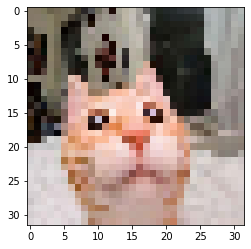

In [ ]:
img_path = 'x_58a97df8.jpg'
img = image.load_img(img_path, target_size=(32, 32))
plt.imshow(img)
plt.show()

**Преобразуем картинку в массив для распознавания**

In [ ]:
x = image.img_to_array(img)
x /= 255
x = np.expand_dims(x, axis=0)

**Запускаем распознавание**

In [ ]:
prediction = model.predict(x)
prediction = np.argmax(prediction)
print(classes[prediction])

кот
